# Banking assignment 3

### Import dependencies and load data

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib import style

In [3]:
data_lcr = pd.read_excel('datasets/LCR_NSFR.xlsx', sheet_name='results_filtered_LCR') #Data for LCR
data_nsfr = pd.read_excel('datasets/LCR_NSFR.xlsx', sheet_name='results_filtered_NSFR') #Data for NSFR
data_aggregate = pd.read_excel('datasets/LCR_NSFR.xlsx', sheet_name='results1') #Data for the aggregates

lcr_country = pd.read_csv('datasets/LCR_country_clean.csv') #SDW dataset with LCR by country

In [4]:
plt.style.use('seaborn')

/var/folders/y1/w89cf9v14zb9dn4l_yrgzfth0000gn/T/ipykernel_44874/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
# Setting colors
blues = sn.color_palette("Blues", 6, as_cmap=False)
blues_cmap = sn.color_palette("Blues", 6, as_cmap=True)
rocket = sn.color_palette("rocket", 6)
greens = sn.light_palette("seagreen", 6, as_cmap=False)
yellows = sn.color_palette("YlOrBr", 6,  as_cmap=False)
set_2 = sn.color_palette("Set2")
colors = sn.color_palette("hls", 8)

In [6]:
display(blues)

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [7]:
display(greens)

[(0.921460863132993, 0.9512120106378944, 0.9302557793948234),
 (0.7732471218789434, 0.8699892163534527, 0.8124399176335058),
 (0.6250333806248938, 0.7887664220690112, 0.6946240558721881),
 (0.4768196393708443, 0.7075436277845695, 0.5768081941108705),
 (0.32860589811679464, 0.6263208335001278, 0.4589923323495529),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353)]

In [8]:
display(yellows)

[(0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (0.996078431372549, 0.8549173394848135, 0.493517877739331),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645904),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661)]

### Data cleaning and processing

In [9]:
data_lcr.replace("n.a.", np.nan, inplace=True)
data_nsfr.replace('n.a.', np.nan, inplace=True)

In [10]:
data_lcr['Country ISO code'] = data_lcr['Country ISO code'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany', 'IT': 'Italy', 'NL': 'Netherlands', 'BE': 'Belgium', 
                       'AT': 'Austria', 'IE': 'Ireland', 'PT': 'Portugal', 'GR': 'Greece', 'LU': 'Luxembourg', 'SK': 'Slovakia', 
                       'HR': 'Croatia', 'SI': 'Slovenia', 'CY': 'Cyprus', 'LT': 'Lithuania', 'MT': 'Malta', 'EE': 'Estonia', 'FI': 'Finland', 'LV': 'Latvia'})

data_nsfr['Country ISO code'] = data_nsfr['Country ISO code'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany', 'IT': 'Italy', 'NL': 'Netherlands', 'BE': 'Belgium', 
                       'AT': 'Austria', 'IE': 'Ireland', 'PT': 'Portugal', 'GR': 'Greece', 'LU': 'Luxembourg', 'SK': 'Slovakia', 
                       'HR': 'Croatia', 'SI': 'Slovenia', 'CY': 'Cyprus', 'LT': 'Lithuania', 'MT': 'Malta', 'EE': 'Estonia', 'FI': 'Finland', 'LV': 'Latvia'})

data_aggregate['Country ISO code'] = data_aggregate['Country ISO code'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany', 'IT': 'Italy', 'NL': 'Netherlands', 'BE': 'Belgium', 
                       'AT': 'Austria', 'IE': 'Ireland', 'PT': 'Portugal', 'GR': 'Greece', 'LU': 'Luxembourg', 'SK': 'Slovakia', 
                       'HR': 'Croatia', 'SI': 'Slovenia', 'CY': 'Cyprus', 'LT': 'Lithuania', 'MT': 'Malta', 'EE': 'Estonia', 'FI': 'Finland', 'LV': 'Latvia'})

In [11]:
data_lcr.rename(columns={'Total assets\nbn EUR 2021':'Total assets 2021',
                         'Total assets\nbn EUR 2020':'Total assets 2020',
                         'Total assets\nbn EUR 2019':'Total assets 2019',
                         'Total assets\nbn EUR 2018':'Total assets 2018',
                         
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021':'LCR 2021',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020':'LCR 2020',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019':'LCR 2019',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2018':'LCR 2018'},
                inplace=True)

In [12]:
data_nsfr.rename(columns={'Total assets\nbn EUR 2021':'Total assets 2021',
                         'Total assets\nbn EUR 2020':'Total assets 2020',
                         'Total assets\nbn EUR 2019':'Total assets 2019',
                         'Total assets\nbn EUR 2018':'Total assets 2018',
                         
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021':'NSFR 2021',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020':'NSFR 2020',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019':'NSFR 2019',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018':'NSFR 2018'},
                inplace=True)

In [13]:
data_aggregate.rename(columns={'Total assets\nbn EUR 2021':'Total assets 2021',
                         'Total assets\nbn EUR 2020':'Total assets 2020',
                         'Total assets\nbn EUR 2019':'Total assets 2019',
                         'Total assets\nbn EUR 2018':'Total assets 2018',
                         
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021':'LCR 2021',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020':'LCR 2020',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019':'LCR 2019',
                         'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2018':'LCR 2018',
                         
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021':'NSFR 2021',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020':'NSFR 2020',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019':'NSFR 2019',
                         'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018':'NSFR 2018'},
                inplace=True)

In [14]:
data_aggregate.drop(columns='Unnamed: 0', inplace=True)

In [15]:
data_aggregate.iloc[:,10:14] = data_aggregate.iloc[:,10:14].iloc[::-1]
data_aggregate.iloc[:,14:18] = data_aggregate.iloc[:,14:18].iloc[:,::-1]
data_aggregate.iloc[:,18:22] = data_aggregate.iloc[:,18:22].iloc[:,::-1]

data_aggregate.rename(columns={'Total assets 2021 (bn EUR)': 'Total assets 2018',
                               'Total assets 2020 (bn EUR)': 'Total assets 2019',
                               'Total assets 2019 (bn EUR)': 'Total assets 2020',
                               'Total assets 2018 (bn EUR)': 'Total assets 2021',
                               'LCR 2021': 'LCR 2018',
                               'LCR 2020': 'LCR 2019',
                               'LCR 2019': 'LCR 2020',
                               'LCR 2018': 'LCR 2021',
                               'NSFR 2021': 'NSFR 2018',
                               'NSFR 2020': 'NSFR 2019',
                               'NSFR 2019': 'NSFR 2020',
                               'NSFR 2018': 'NSFR 2021'}, inplace=True)

#data_aggregate.head()

In [16]:
data_lcr.iloc[:,14:18] = data_lcr.iloc[:,14:18].iloc[:,::-1]
data_lcr.iloc[:,10:14] = data_lcr.iloc[:,10:14].iloc[:,::-1]

data_lcr.rename(columns={'Total assets 2021 (bn EUR)': 'Total assets 2018 (bn EUR)',
                        'Total assets 2020 (bn EUR)': 'Total assets 2019 (bn EUR)',
                        'Total assets 2019 (bn EUR)': 'Total assets 2020 (bn EUR)',
                        'Total assets 2018 (bn EUR)': 'Total assets 2021 (bn EUR)',
                        'LCR 2021': 'LCR 2018',
                        'LCR 2020': 'LCR 2019',
                        'LCR 2019': 'LCR 2020',
                        'LCR 2018': 'LCR 2021',}, inplace=True)

#data_lcr.head()

In [17]:
data_nsfr.iloc[:,14:18] = data_nsfr.iloc[:,14:18].iloc[:,::-1]
data_nsfr.iloc[:,10:14] = data_nsfr.iloc[:,10:14].iloc[:,::-1]


# alternative way to rename columns by variable swapping
col_list = list(data_nsfr)

# for tot assets names
col_list[10], col_list[11], col_list[12], col_list[13] = col_list[13], col_list[12], col_list[11], col_list[10]
# for LCR names
col_list[14], col_list[15], col_list[16], col_list[17] = col_list[17], col_list[16], col_list[15], col_list[14]

data_nsfr.columns = col_list

#data_nsfr.head()

In [18]:
display(lcr_country)

,Period,Austria,Belgium,Cyprus,Germany,Estonia,Spain,Finland,France,Greece,...,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Portugal,Slovenia,Slovakia
0,2021Q4,176.42,186.15,333.33,162.54,156.73,203.05,179.21,158.15,200.65,...,167.21,192.44,379.90,173.58,347.10,419.29,159.23,283.85,293.10,NaN
1,2021Q3,180.03,174.79,323.54,162.26,188.44,206.62,186.35,155.39,209.50,...,178.72,198.45,448.13,176.90,361.16,444.56,168.46,279.78,304.87,NaN
2,2021Q2,184.81,183.95,344.12,159.76,186.10,205.34,177.61,156.03,206.05,...,175.87,197.11,434.46,170.20,334.16,519.74,175.05,279.78,302.79,NaN
3,2021Q1,178.48,189.71,314.65,163.21,204.53,196.74,174.55,158.60,185.26,...,165.77,193.91,463.85,156.85,357.19,437.82,161.48,290.83,293.19,NaN
4,2020Q4,181.99,175.03,311.61,156.67,195.55,186.67,171.35,163.72,174.80,...,172.38,187.02,763.19,168.73,NaN,383.78,164.86,265.59,NaN,NaN
5,2020Q3,174.92,171.73,310.01,162.39,180.16,189.76,178.11,162.45,155.80,...,165.66,191.96,575.30,165.01,NaN,387.81,154.94,256.26,NaN,NaN
6,2020Q2,166.06,169.05,328.61,152.80,176.71,194.10,165.14,156.77,158.51,...,155.92,180.01,397.74,170.35,NaN,386.38,152.17,269.75,NaN,NaN
7,2020Q1,141.71,142.73,315.53,140.76,157.61,163.11,171.28,138.35,125.65,...,161.35,161.15,301.25,154.77,NaN,402.18,128.64,239.01,NaN,NaN
8,2019Q4,142.96,154.05,297.70,151.50,NaN,157.74,168.28,133.06,130.80,...,153.19,149.12,NaN,146.90,NaN,NaN,132.14,232.28,355.06,NaN
9,2019Q3,138.88,151.78,331.02,145.57,NaN,158.18,183.92,132.82,115.43,...,142.54,164.30,NaN,141.34,NaN,NaN,127.35,217.23,366.79,NaN


In [19]:
data_lcr['Mean LCR'] = data_lcr.iloc[:,14:].mean(axis=1)

In [20]:
data_nsfr['Mean NSFR'] = data_nsfr.iloc[:,14:].mean(axis=1)

### Data analysis

In [21]:
lcr_grouped = data_lcr.groupby(['Country ISO code'])[['LCR 2018', 'LCR 2019', 'LCR 2020', 'LCR 2021']].mean()

In [22]:
lcr_grouped.head()

,LCR 2018,LCR 2019,LCR 2020,LCR 2021
Country ISO code,,,,
Austria,147.755000,143.502500,185.417500,174.542500
Belgium,155.057500,157.665000,173.748875,175.938750
Finland,181.000000,298.100000,211.200000,247.450000
France,166.004762,233.884286,216.394286,223.637143
Germany,156.362308,162.702308,174.230769,172.146154


#### LCR analysis

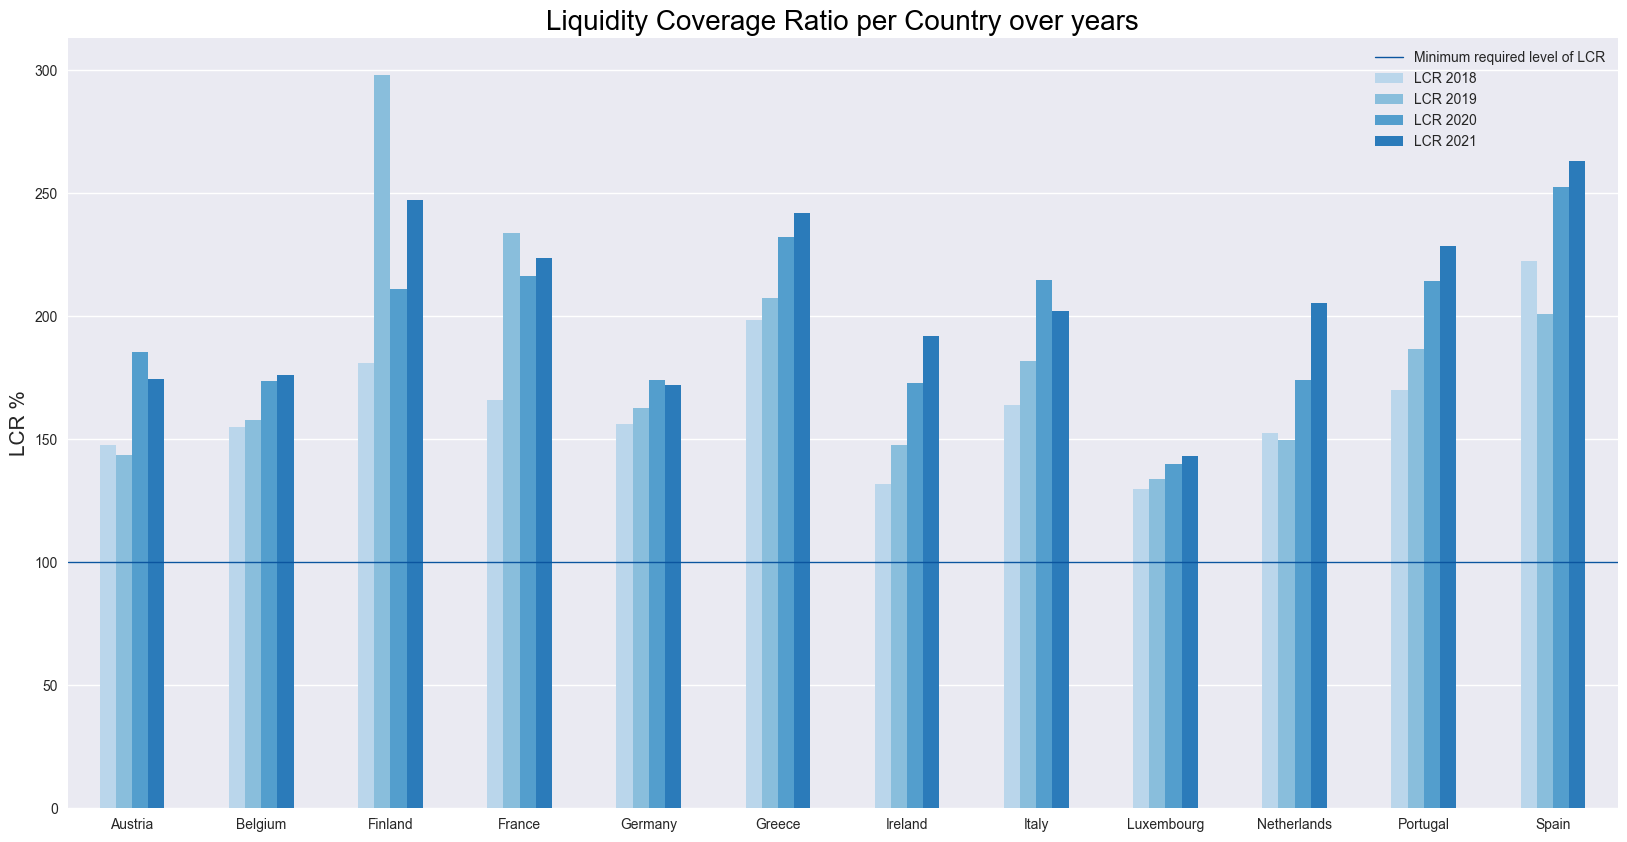

In [23]:
sn.set_palette(blues[1:5])
ax = lcr_grouped.plot(kind='bar', figsize=(20, 10), title='Liquidity Coverage Ratio (LCR) per Country over time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('')
ax.set_ylabel('LCR %', fontsize=15)
plt.axhline(y=100, color=blues[5], linestyle='-', linewidth=1, label='Minimum required level of LCR')
plt.title('Liquidity Coverage Ratio per Country over years' , color='black', fontsize=20)
plt.grid(axis="y", alpha=1)
plt.grid(axis="x", alpha=0.0)
plt.legend()
plt.show()

First of all we notice that all the banks in these countries respect the minimum level of LCR of 100% which is obviously good. Overall we can say that in the period from 2018 to 2021 (our period of interest) there has been an increasing trend of the Liquidity Coverage Ratio. Banks and financial institutions should attempt to achieve a LCR higher than the 100% treshold: in fact, in most cases, banks will maintain a higher level of capital to give themselves a sort of liquidity cushion.

The most interesting thing is the fact that usually, during a crisis, on average the LCR tend to decrease but here we can notice a slight increase during the two years of the pandemic crisis. 

Why? What could be the possible drivers of this evolution?

Let's take a look at the 10y Bonds yields daily curve:

In [24]:
# first we load the data downloaded from SDW
bond_yields = pd.read_csv('datasets/yields_10y.csv')
bond_yields['Date'] = pd.to_datetime(bond_yields['Date'], format = '%d/%m/%y')

In [25]:
# some data manipulation
bond_yields = bond_yields[::-1]
bond_yields.reset_index(inplace=True)
bond_yields.drop(columns='index', inplace=True)
bond_yields.set_index('Date', inplace=True)

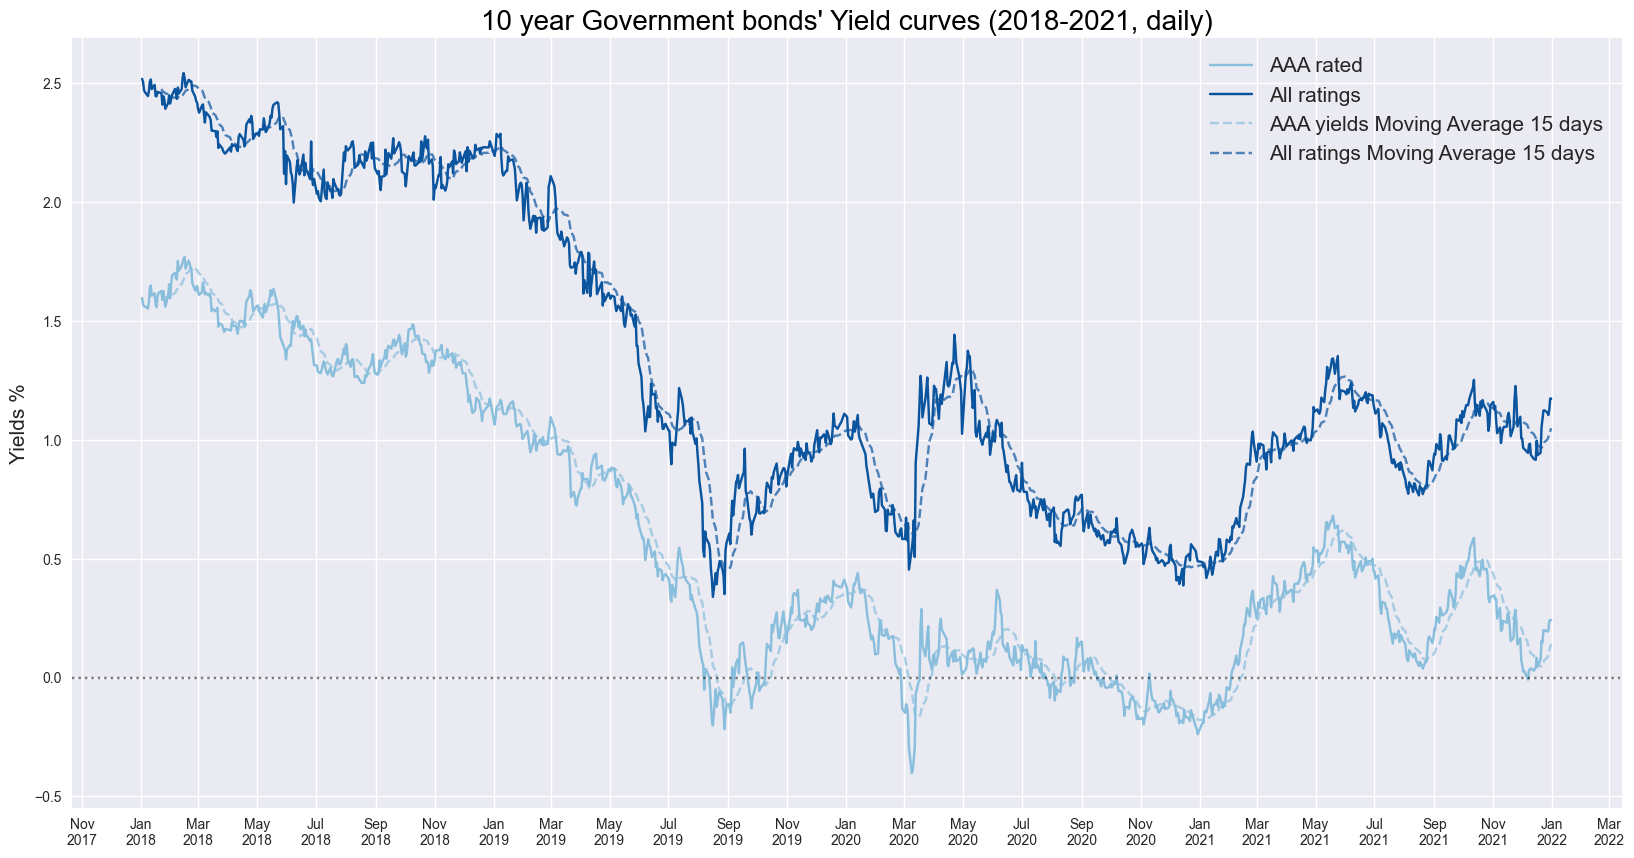

In [26]:
sn.set_palette([blues[2]] + [blues[5]])
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

ax.plot(bond_yields['AAA yields'], label="AAA rated")
ax.plot(bond_yields['All ratings'], label="All ratings")
ax.plot(bond_yields.rolling(window=15).mean()['AAA yields'],
        color ="C0", linestyle='dashed', alpha= 0.7, label="AAA yields Moving Average 15 days")
ax.plot(bond_yields.rolling(window=15).mean()['All ratings'],
        color ="C1", linestyle='dashed', alpha= 0.7, label="All ratings Moving Average 15 days")
ax.set_ylabel('Yields %', fontsize=15)
#ax.set_xlabel('Month-Year', fontsize=15)

# Create custom ticks using matplotlib date tick locator and formatter
loc = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_major_formatter(fmt)

plt.axhline(y=0, color='black', linestyle=':', alpha=0.5)
plt.title("10 year Government bonds' Yield curves (2018-2021, daily)", color='black', fontsize=20)
plt.legend(fontsize=15)
plt.show()

As we can see, during the period of the Covid-19 crisis bond Yields decreased as a consequence of the unconventional monetary policy (quantitative easing and PEPP). 

This means that all the bonds that were in side of the BS of banks appreciated, since their fair value increased as a result of the decrease in the yield curve (both in the secondary market and in the new emission in the primary markets) 
We know from theory that most of the HQLA that are in the numerator of the LCR are composed by bonds that can be immediately liquidated (in 30 days).

When these assets appreciated the numerator increased, hence the ratios increased. This could be one reason for the change. 

Also, we know that at the denominator of LCR there are the Net cash flow outflows over 30 days. So which are the expected outflows in the next 30 days. 
So during the covid 19, people were stuck at home so withdraws from the banks clients decreased (as the average consumption decreased) and so decreased the expected cash outflows for a bank in the next 30 days. 


In [ ]:
lcr_country.iloc[14:,6] = lcr_country.iloc[13,6]

In [ ]:
lcr_country['Period'] = pd.to_datetime(lcr_country['Period'])
lcr_country = lcr_country[::-1]
lcr_country.reset_index(inplace=True)
lcr_country.drop(columns='index', inplace=True)
lcr_country.set_index('Period', inplace=True)

In [ ]:
display(lcr_country)

,Austria,Belgium,Germany,Spain,France,Greece,Italy,Luxembourg
Period,,,,,,,,
2018-01-01,147.13,149.44,154.88,156.91,128.60,33.25,167.04,144.90
2018-04-01,144.45,146.76,152.80,159.60,127.67,33.25,144.83,139.51
2018-07-01,135.13,153.03,154.48,153.82,127.70,33.25,146.98,136.91
2018-10-01,144.40,155.81,151.70,162.08,133.87,47.96,145.45,136.78
2019-01-01,150.12,146.78,157.17,161.51,134.46,74.07,168.05,141.59
2019-04-01,142.60,144.39,151.44,162.21,134.39,99.31,157.21,144.83
2019-07-01,138.88,151.78,145.57,158.18,132.82,115.43,164.30,141.34
2019-10-01,142.96,154.05,151.50,157.74,133.06,130.80,149.12,146.90
2020-01-01,141.71,142.73,140.76,163.11,138.35,125.65,161.15,154.77


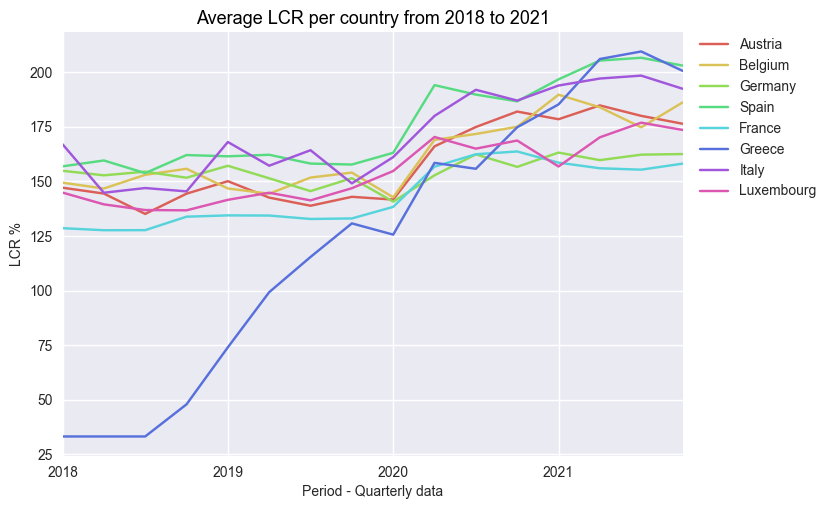

In [ ]:
sn.set_palette(colors)
lcr_country.plot()
plt.title('Average LCR per country from 2018 to 2021', color='black', fontsize=13)
plt.ylabel('LCR %')
plt.xlabel('Period - Quarterly data')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

Here are plotted the average LCR ratios over time in our period of interest: this line plot confirms the increase in trend we talked about in the barplot earlier. The jump of Greece's LCR ratio from 2018 to 2020 is impressive, but it masks a bit the trending of the other countries, therefore we are going to plot the same thing from 2020 to 2021 where they are all aggregated.

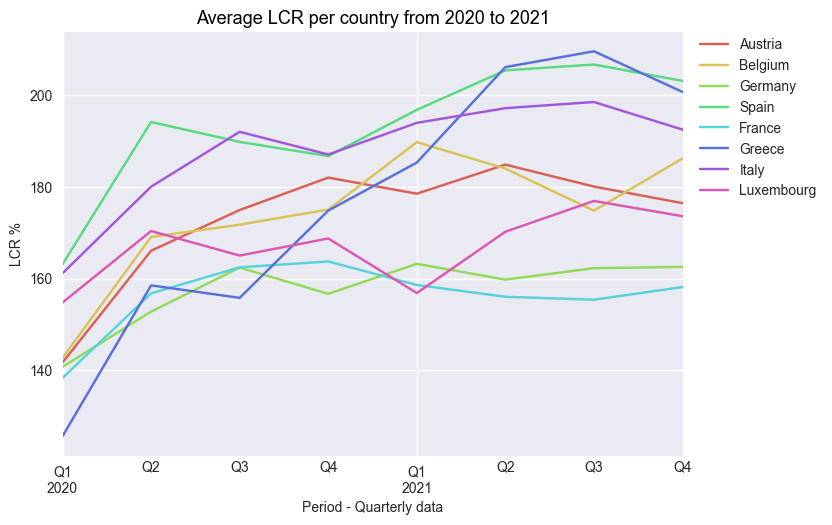

In [ ]:
# sn.set_palette(colors)
lcr_country.loc['2020-01-01':'2021-10-01',:].plot()
plt.title('Average LCR per country from 2020 to 2021', color='black', fontsize=13)
plt.ylabel('LCR %')
plt.xlabel('Period - Quarterly data')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

LCR CHECK

In [ ]:
df1 = data_lcr[['Company name Latin alphabet', 'LCR 2018', 'LCR 2019', 'LCR 2020', 'LCR 2021']]

In [ ]:
# really quick check for non respecting levels of LCR
non_respecting_LCR = []
for i in range(len(df1)):
    for j in ['LCR 2018', 'LCR 2019', 'LCR 2020', 'LCR 2021']:
        if df1[j][i] < 100:
            print(df1['Company name Latin alphabet'][i], df1[j][i])
            non_respecting_LCR.append(df[j][i])
if len(non_respecting_LCR) == 0:
    print("All banks respect the minimum level of LCR = 100%")


All banks respect the minimum level of LCR = 100%


All banks respect the minimum level of LCR = 100%.

#### NSFR Analysis

In [27]:
nsfr_grouped = data_nsfr.groupby(['Country ISO code'])[['NSFR 2018', 'NSFR 2019', 'NSFR 2020', 'NSFR 2021']].mean()

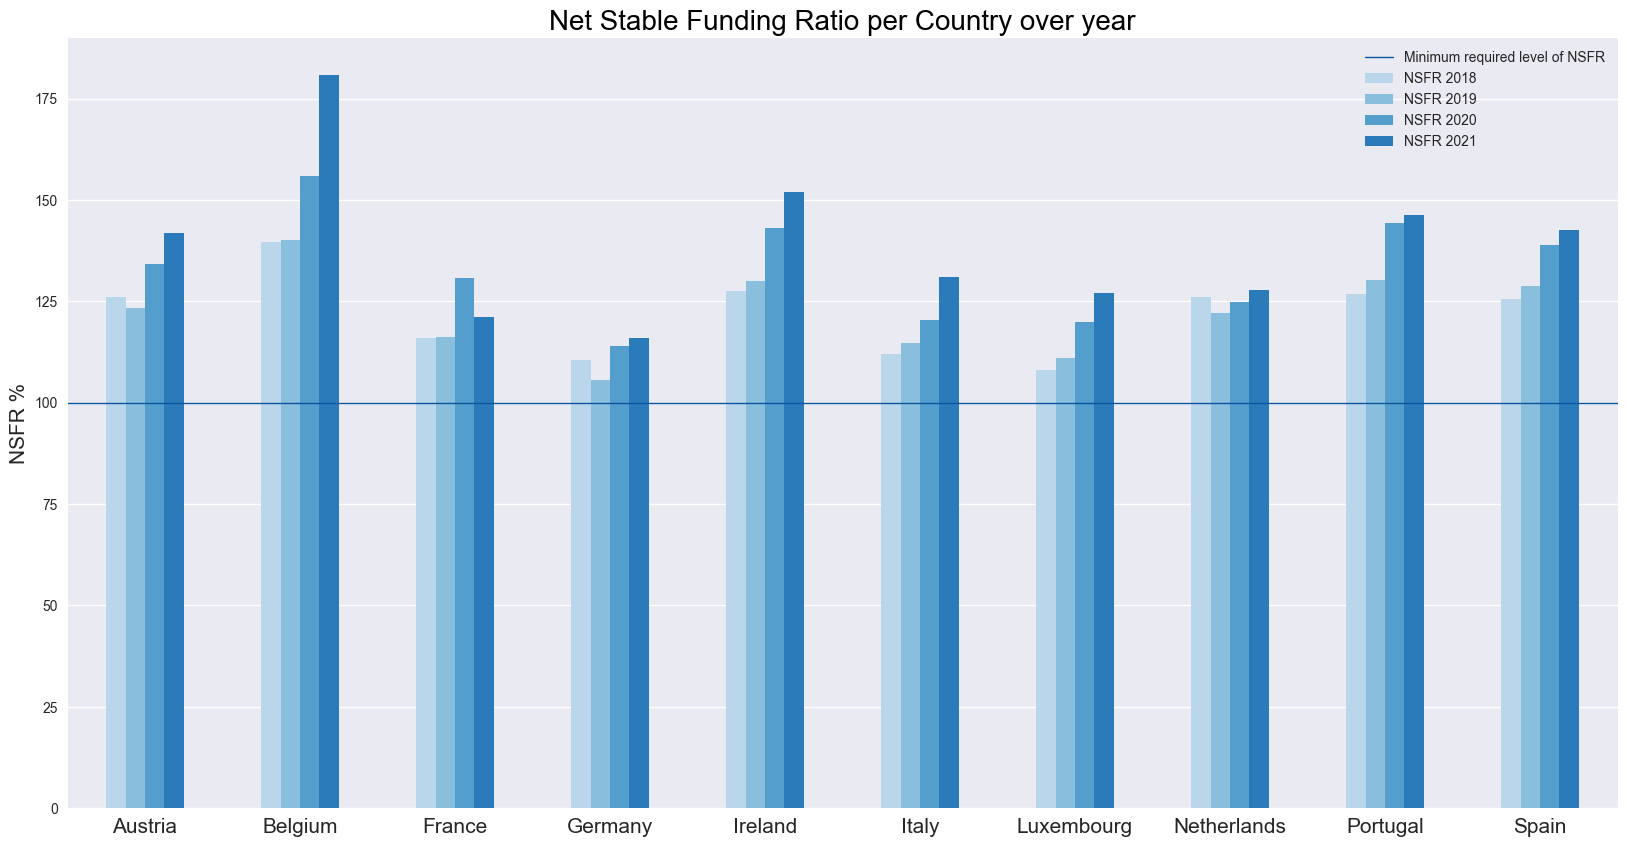

In [28]:
sn.set_palette(blues[1:5])
ax = nsfr_grouped.plot(kind='bar', figsize=(20, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('NSFR %', fontsize=15)
plt.axhline(y=100, color=blues[5], linestyle='-', linewidth=1, label='Minimum required level of NSFR')
plt.title('Net Stable Funding Ratio per Country over year' , color='black', fontsize=20)
plt.grid(axis="y", alpha=1)
plt.grid(axis="x", alpha=0.0)
plt.legend()
plt.show()

In this NSFR barplot we can make similar considerations to the ones we did with the LCR, but we notice that, on average, the LCR tends to be higher than the NSFR. This could mean that banks are more worried about financial problems/stress scenarios in the short term rather than the long term. 
The reason this plot is different from the LCR one is the fact that we did not have NSFR data for all the banks we had the LCR for; however, by looking at the two plots together, we can state that for NSFT there is much more homogeneity in the behaviour of the volumes across countries.

What were the drivers for the increase of the NSFR (that usually decrease during period of crisis as the LCR).

NSFR CHECK

In [31]:
df2 = data_nsfr[['Company name Latin alphabet', 'NSFR 2018', 'NSFR 2019', 'NSFR 2020', 'NSFR 2021']]

In [32]:
# really quick check for non respecting levels of NSFR
non_respecting_NSFR = []
for i in range(len(df2)):
    for j in ['NSFR 2018', 'NSFR 2019', 'NSFR 2020', 'NSFR 2021']:
        if df2[j][i] < 100:
            print(df2['Company name Latin alphabet'][i], df2[j][i])
            non_respecting_NSFR.append(df2[j][i])
if len(non_respecting_NSFR) == 0:
    print("All banks respect the minimum level of NSFR = 100%")

LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HELABA 97.0


In [33]:
display(data_aggregate.iloc[7])

Company name Latin alphabet    LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HE...
Inactive                                                                      No
Quoted                                                                        No
Branch                                                                        No
OwnData                                                                       No
Woco                                                                         Yes
Sifi                                                                          No
Country ISO code                                                         Germany
Consolidation code                                                            C2
Last avail. year                                                            2022
Total assets 2021                                                            212
Total assets 2020                                                            219
Total assets 2019           

We want to investigate a bit on this german bank. So let's plot a line plot of the NSFR and LCR over time for this bank:

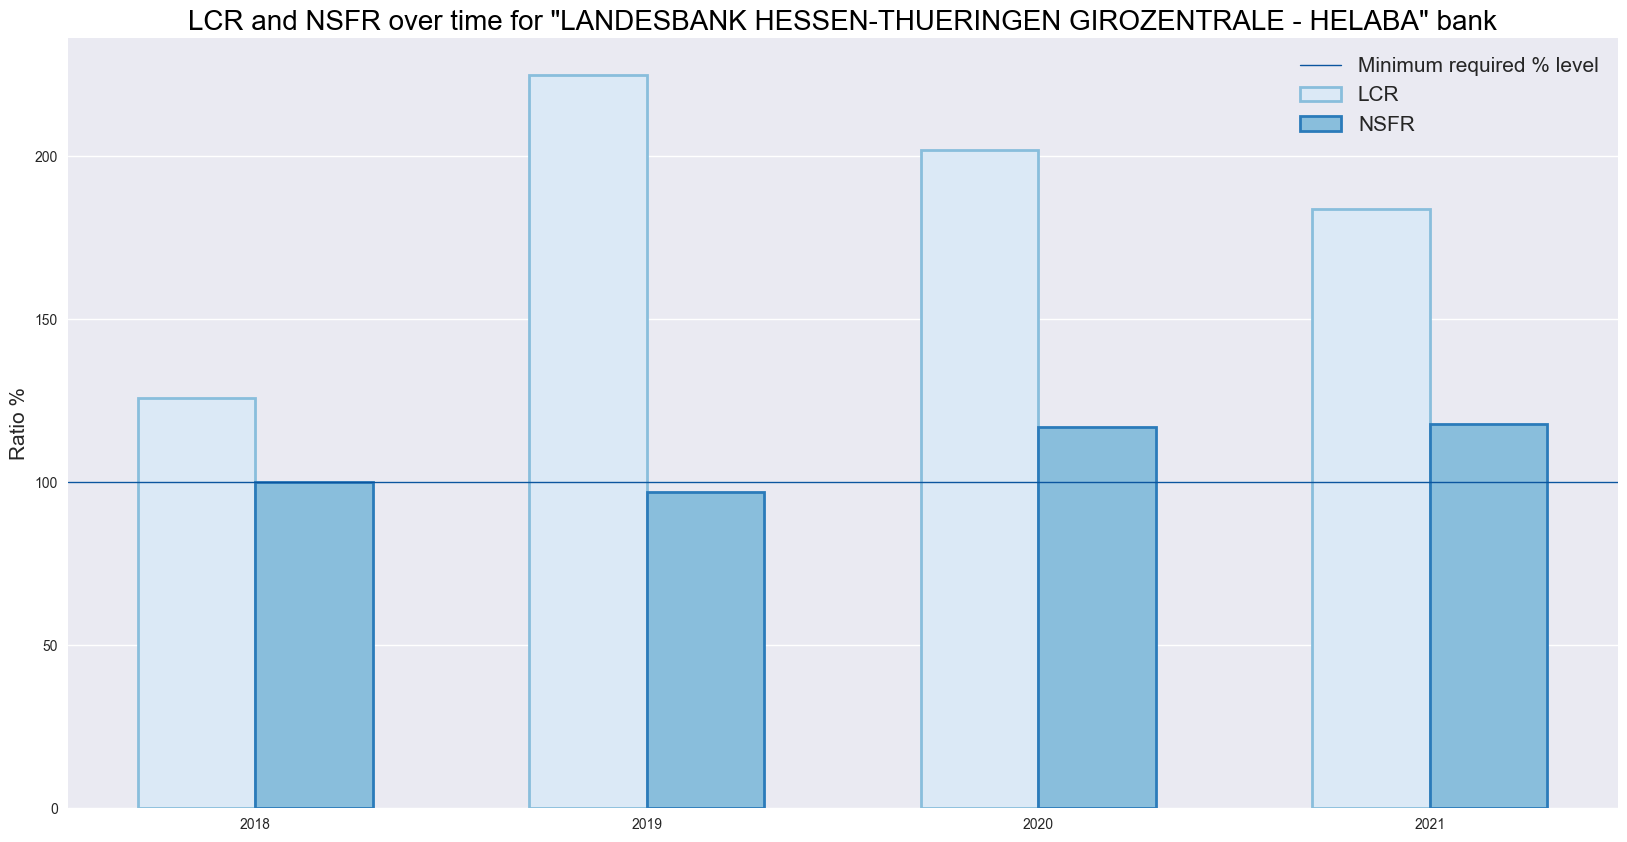

In [34]:
bar_width=0.3
x_pos=np.arange(2018,2022)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x_pos, data_aggregate.iloc[7,14:18], width=bar_width, label='LCR',
       color=blues[0], edgecolor=blues[2], linewidth=2)
ax.bar(x_pos + bar_width, data_aggregate.iloc[7,18:], width=bar_width, label='NSFR',
      color=blues[2], edgecolor=blues[4], linewidth=2)
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(range(2018, 2022))
#plt.xlabel('Years')
plt.ylabel('Ratio %', fontsize=15)
plt.axhline(y=100, color=blues[5], linestyle='-', linewidth=1, label='Minimum required % level')
plt.title('LCR and NSFR over time for "LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HELABA" bank', color='black', fontsize=20)
plt.legend(fontsize=15)
plt.grid(axis="y", alpha=1)
plt.grid(axis="x", alpha=0.0)
plt.show()

Why the LCR remained a lot above the average while the NSFR struggled a bit to maintain its levels?

This could be due to various reasons. For instance, during a period of financial stress or market turbulence, the LCR could be more challenging to maintain because it requires banks to hold HQLA, which could be costly and affect the bank's profitability. In contrast, the NSFR could be more manageable during such periods because it focuses on stable funding sources that are less volatile and may not require immediate refinancing.

Another reason could be that the bank's business model and funding structure may not be aligned with the NSFR requirements. For example, if a bank has a significant portion of its funding coming from short-term sources such as wholesale deposits or commercial paper, it may struggle to maintain the NSFR requirements.

In summary, the LCR and NSFR are different ratios designed to address different liquidity risk management needs. The factors affecting their performance can vary depending on the market environment, the bank's business model, and funding structure.

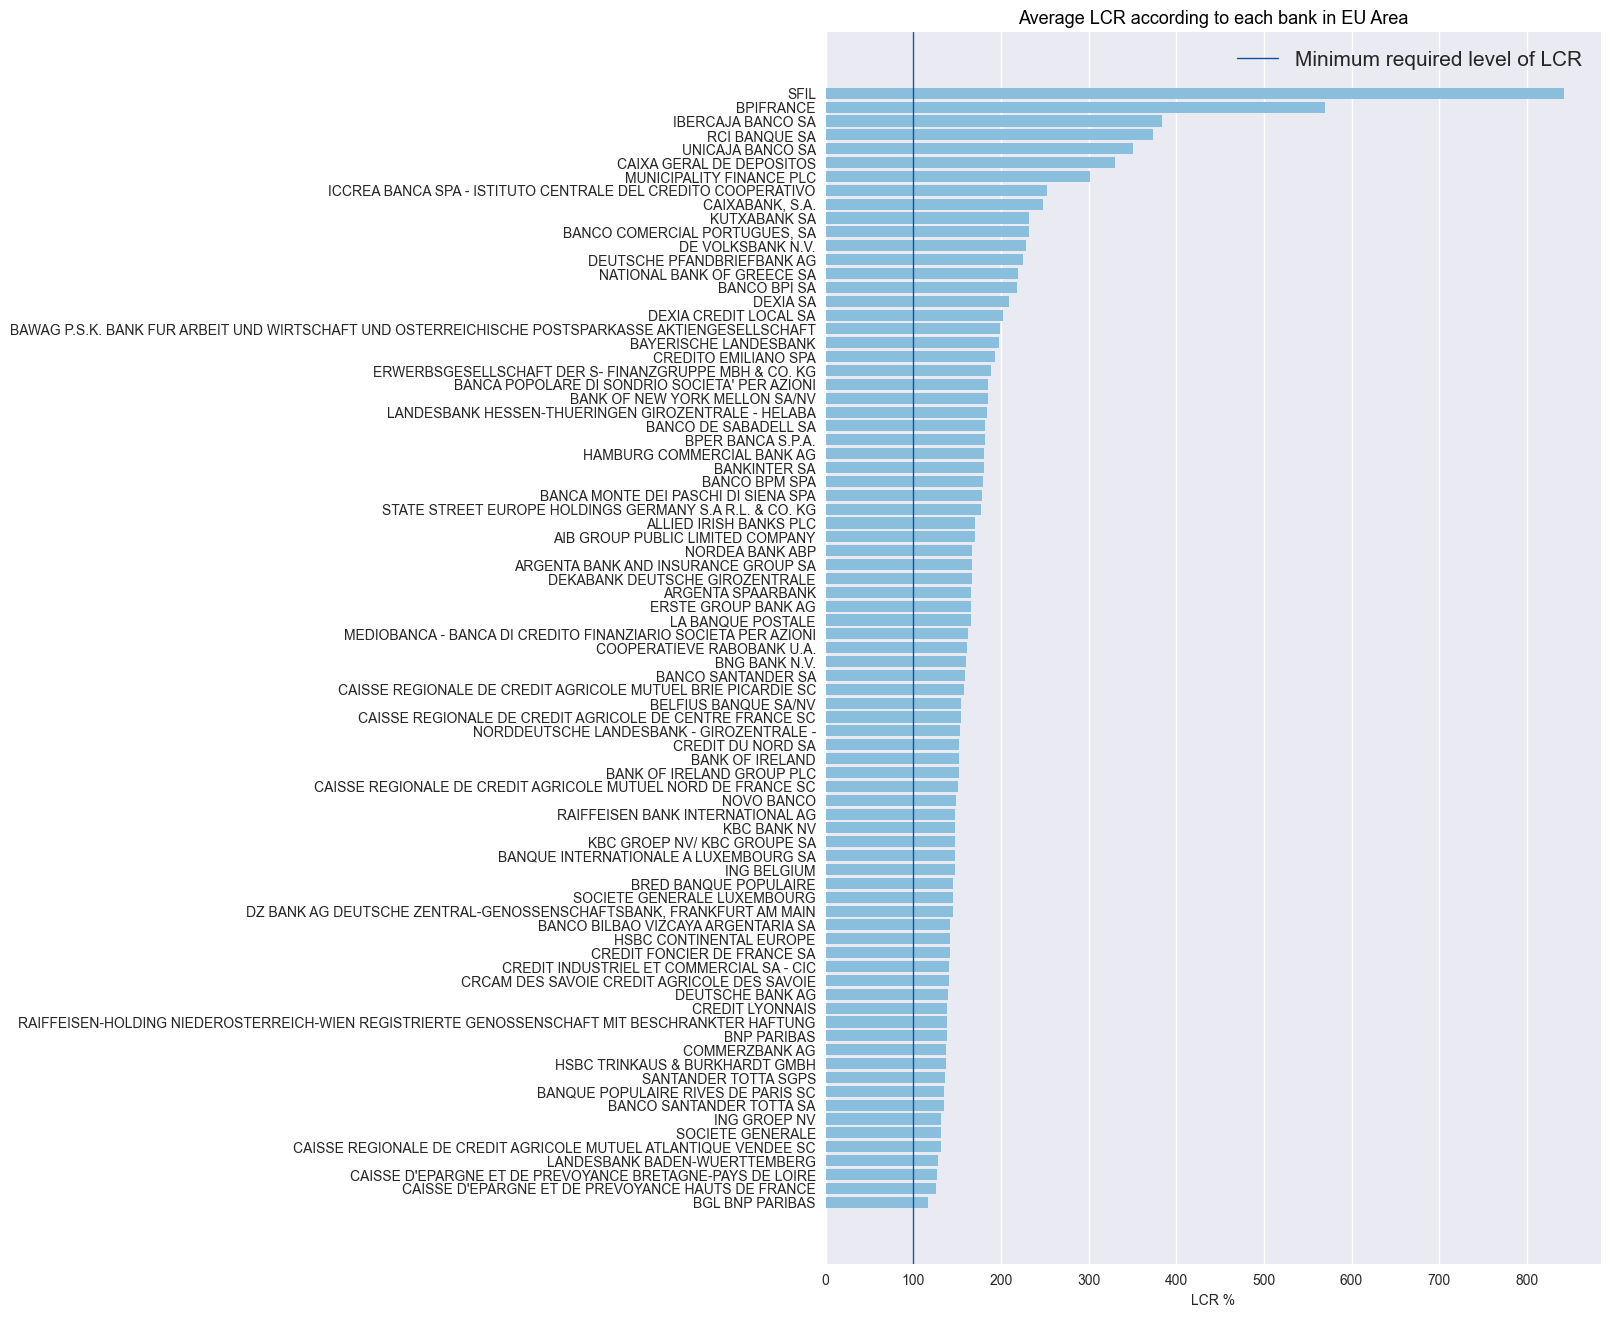

In [35]:
sn.set_palette(blues[4:])
plt.figure(figsize=(10, 16))
plt.barh(data_lcr.sort_values('Mean LCR')['Company name Latin alphabet'],
         data_lcr.sort_values('Mean LCR')['Mean LCR'], color=blues[2])
plt.title('Average LCR according to each bank in EU Area', color='black', fontsize=13)
plt.xlabel('LCR %')
plt.grid(axis="y", alpha=0)
plt.grid(axis="x", alpha=1)
plt.axvline(x=100, color=blues[5], linestyle='-', linewidth=1, label='Minimum required level of LCR')
plt.legend(fontsize=15)
plt.show()

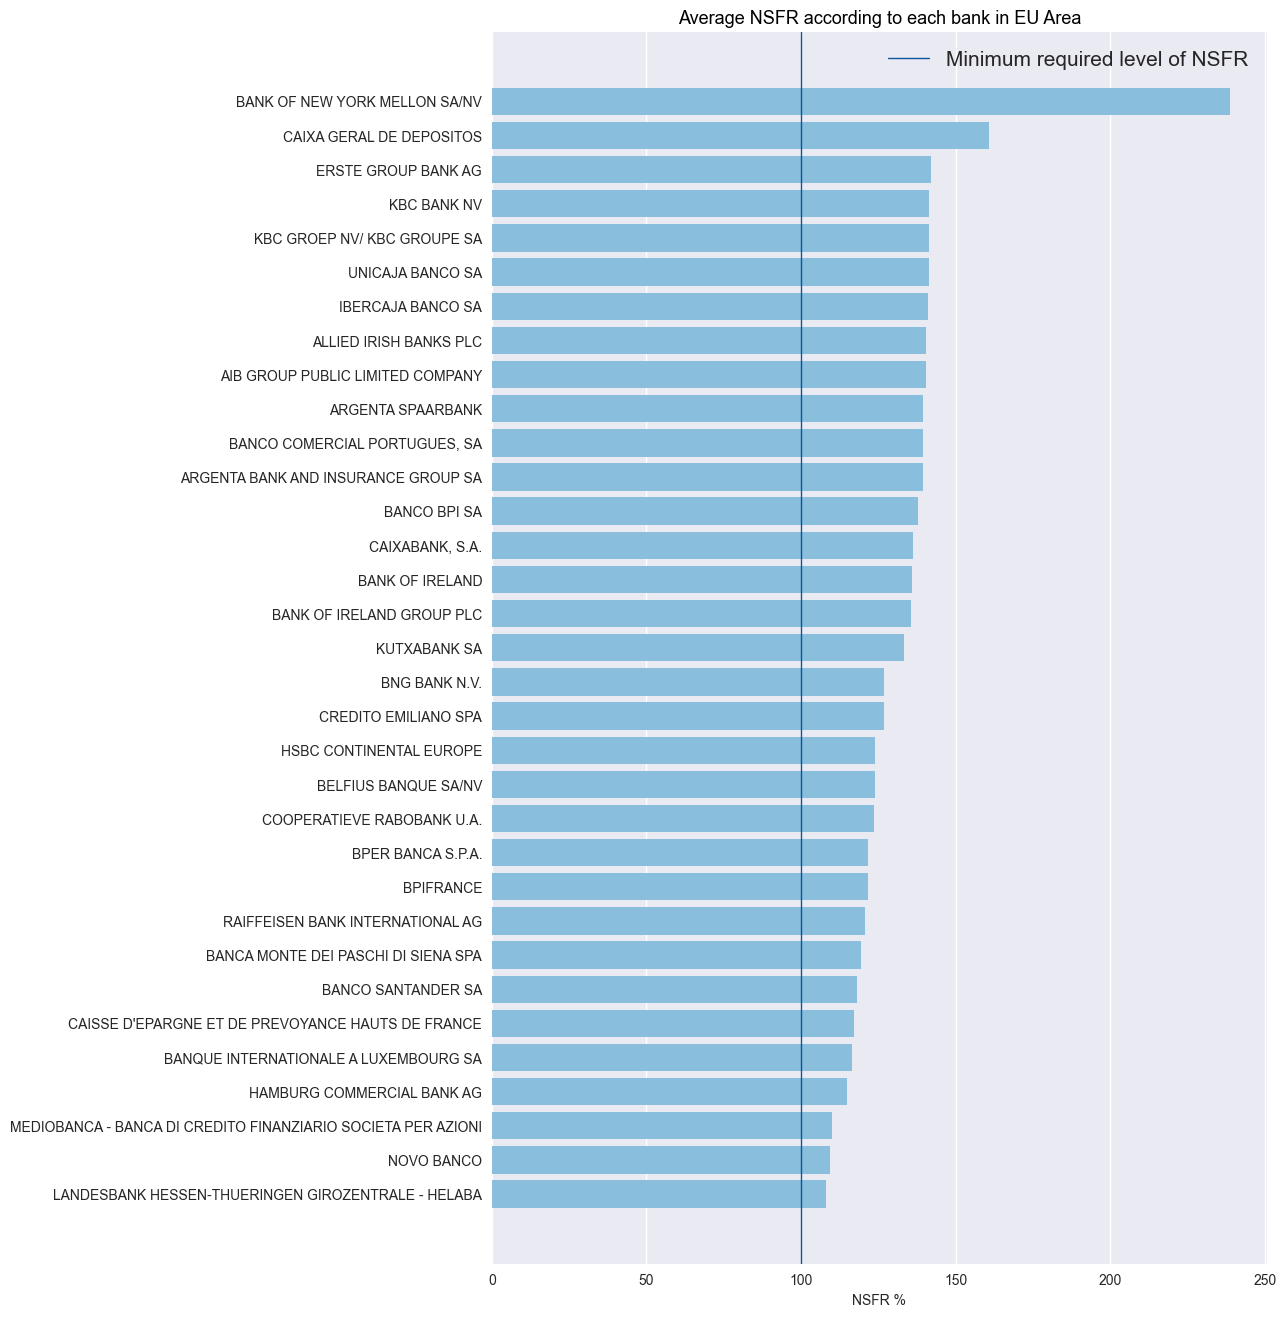

In [36]:
plt.figure(figsize=(10, 16))
plt.barh(data_nsfr.sort_values('Mean NSFR')['Company name Latin alphabet'],
         data_nsfr.sort_values('Mean NSFR')['Mean NSFR'], color=blues[2])
plt.title('Average NSFR according to each bank in EU Area', color='black', fontsize=13)
plt.xlabel('NSFR %')
plt.grid(axis="y", alpha=0)
plt.grid(axis="x", alpha=1)
plt.axvline(x=100, color=blues[5], linestyle='-', linewidth=1, label='Minimum required level of NSFR')
plt.legend(fontsize=15)
plt.show()

Self explanatory barplots: on average in this period all banks stay above the minimum of 100% both in the LCR and NSFR scenarios. Surely there are some banks with really high levels.

### Correlation between LCR and NSFR

In [37]:
corr = data_aggregate.iloc[:, 14:18].mean(axis = 1).corr(data_aggregate.iloc[:, 18:22].mean(axis=1))
print(f'The correlation between mean LCR and mean NSFR is {round(corr, 4)*100}%')

The correlation between mean LCR and mean NSFR is 10.66%


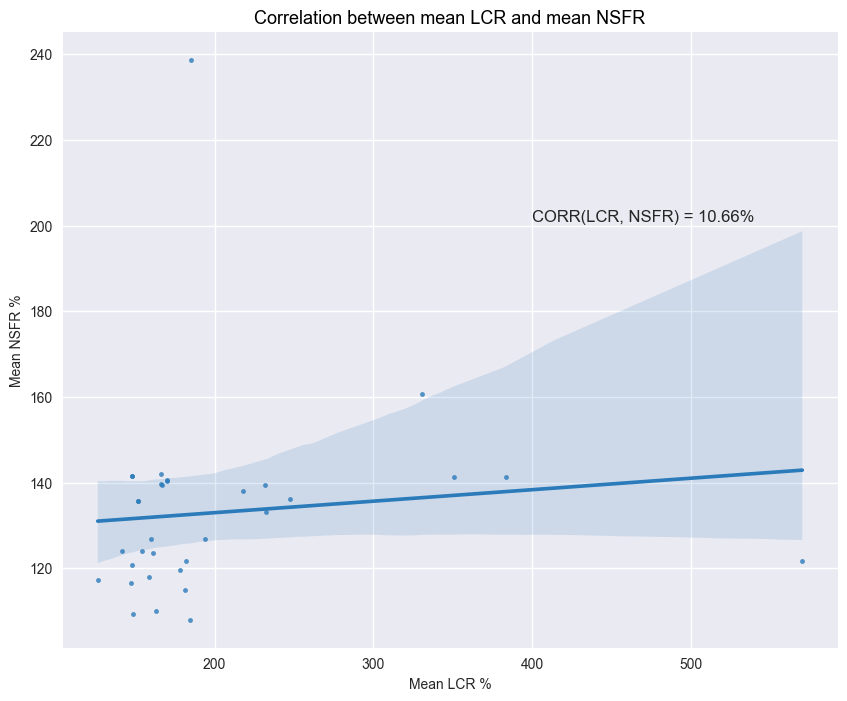

In [38]:
plt.figure(figsize=(10,8))
sn.regplot(x=data_aggregate.iloc[:, 14:18].mean(axis = 1), y=data_aggregate.iloc[:, 18:22].mean(axis = 1), 
           data=data_aggregate, color=blues[4], marker=".")
plt.text(x=400, y=201, s=f'CORR(LCR, NSFR) = {round(corr, 4)*100}%', fontsize=12)
plt.xlabel('Mean LCR %')
plt.ylabel('Mean NSFR %')
plt.title('Correlation between mean LCR and mean NSFR', color='black', fontsize=13)
plt.show()

In [39]:
LCR_list = []
NSFR_list = []
for i in range(14, 18):
    LCR_list = LCR_list + list(data_aggregate.iloc[:, i])
for i in range(18, 22):
    NSFR_list = NSFR_list + list(data_aggregate.iloc[:, i])

In [40]:
corr = pd.Series(LCR_list).corr(pd.Series(NSFR_list))
print(f'The correlation between LCR and NSFR is {round(corr, 4)*100}%')

The correlation between LCR and NSFR is 16.81%


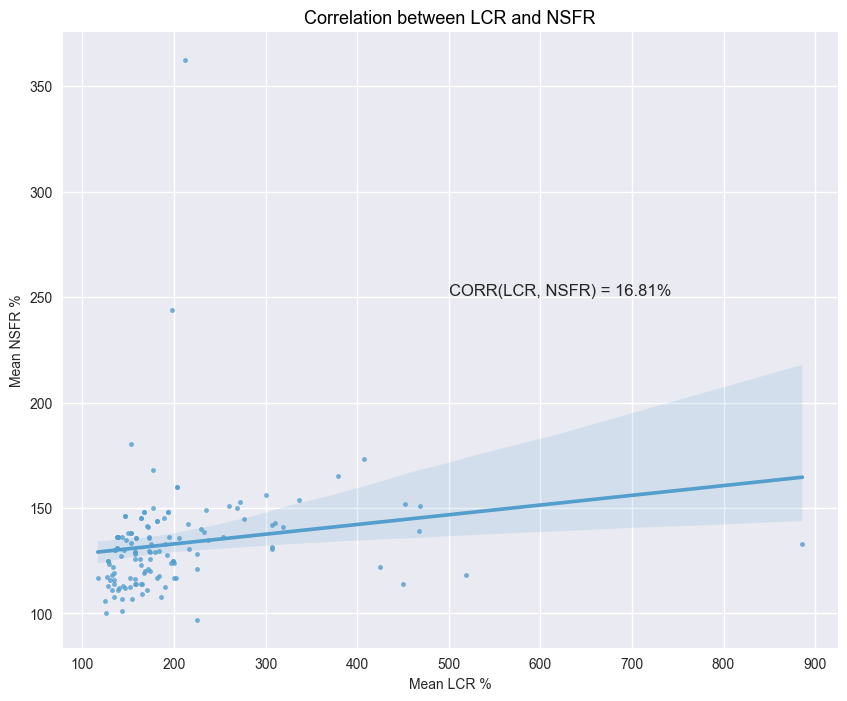

In [41]:
plt.figure(figsize=(10,8))
sn.regplot(x=LCR_list, y=NSFR_list, 
           data=data_aggregate, color=blues[3], marker=".")
plt.text(x=500, y=251, s=f'CORR(LCR, NSFR) = {round(corr, 4)*100}%', fontsize=12)
plt.xlabel('Mean LCR %')
plt.ylabel('Mean NSFR %')
plt.title('Correlation between LCR and NSFR', color='black', fontsize=13)
plt.show()

By looking at the ratios over time ( increase in both), we suspected a positive correlation but for sure a higher value since they both check if financial institutions have sufficient liquidity to meet their short-term (LCR) and long-term obligations (NSFR); but it seems that in the period 2018-2021 the two ratios are not correlated that much, maybe also due to the covid pandemic.

Here we calculated the correlation between the two ratios using two different approaches: the difference between the two methods lies in how they are treating the data. The first method calculates the mean of each column and then calculates the correlation between the means, while the second method calculates the correlation between the entire columns without any aggregation.

Generally, it is advisable to use the first method because it takes the mean values, which provides a more stable measure for correlation. The second method might introduce more noise into the data as it uses the entire columns without any aggregation. However, the choice of the method depends on the specific requirements of the analysis.

/var/folders/y1/w89cf9v14zb9dn4l_yrgzfth0000gn/T/ipykernel_44874/1920680996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_nsfr['Mean NSFR'])


<Axes: xlabel='Mean NSFR', ylabel='Density'>

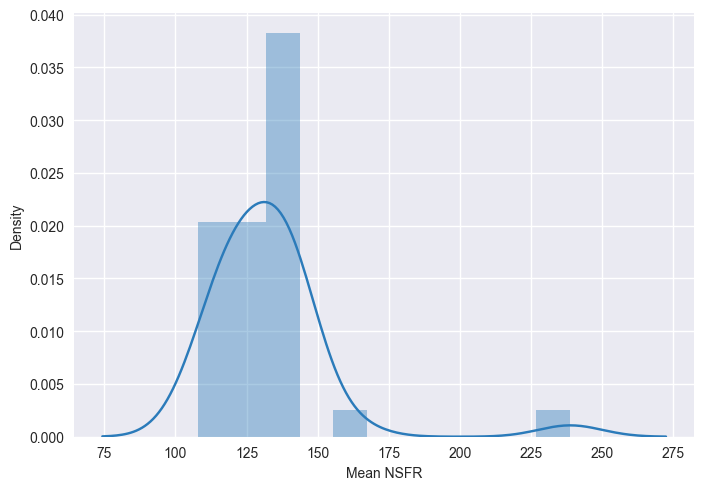

In [42]:
sn.distplot(data_nsfr['Mean NSFR'])

/var/folders/y1/w89cf9v14zb9dn4l_yrgzfth0000gn/T/ipykernel_44874/858760767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_lcr['Mean LCR'])


<Axes: xlabel='Mean LCR', ylabel='Density'>

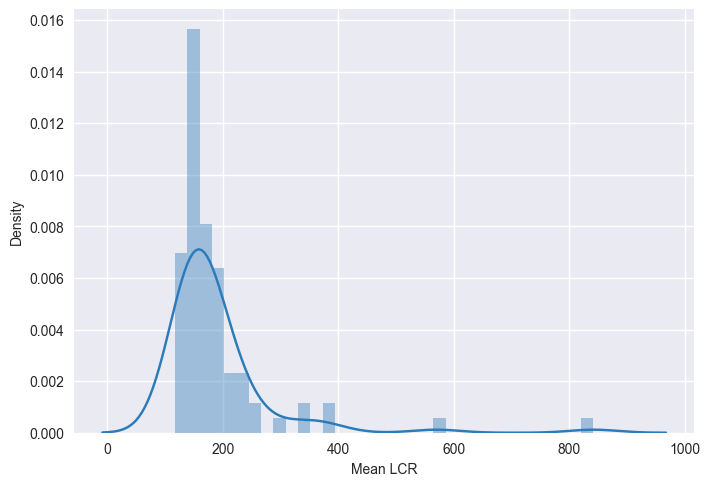

In [43]:
sn.distplot(data_lcr['Mean LCR'])

In [44]:
# picking just the most important countries
lcr_country = lcr_country[['Period', 'Austria', 'Belgium', 'Germany', 'Spain', 'France', 'Greece', 'Italy', 'Luxembourg']]
display(lcr_country)

,Period,Austria,Belgium,Germany,Spain,France,Greece,Italy,Luxembourg
0,2021Q4,176.42,186.15,162.54,203.05,158.15,200.65,192.44,173.58
1,2021Q3,180.03,174.79,162.26,206.62,155.39,209.50,198.45,176.90
2,2021Q2,184.81,183.95,159.76,205.34,156.03,206.05,197.11,170.20
3,2021Q1,178.48,189.71,163.21,196.74,158.60,185.26,193.91,156.85
4,2020Q4,181.99,175.03,156.67,186.67,163.72,174.80,187.02,168.73
5,2020Q3,174.92,171.73,162.39,189.76,162.45,155.80,191.96,165.01
6,2020Q2,166.06,169.05,152.80,194.10,156.77,158.51,180.01,170.35
7,2020Q1,141.71,142.73,140.76,163.11,138.35,125.65,161.15,154.77
8,2019Q4,142.96,154.05,151.50,157.74,133.06,130.80,149.12,146.90
9,2019Q3,138.88,151.78,145.57,158.18,132.82,115.43,164.30,141.34


Greece has 2 NAs but it is an important country so we proceed by assuming the first two values as the third one.

### Asset and ratio analysis

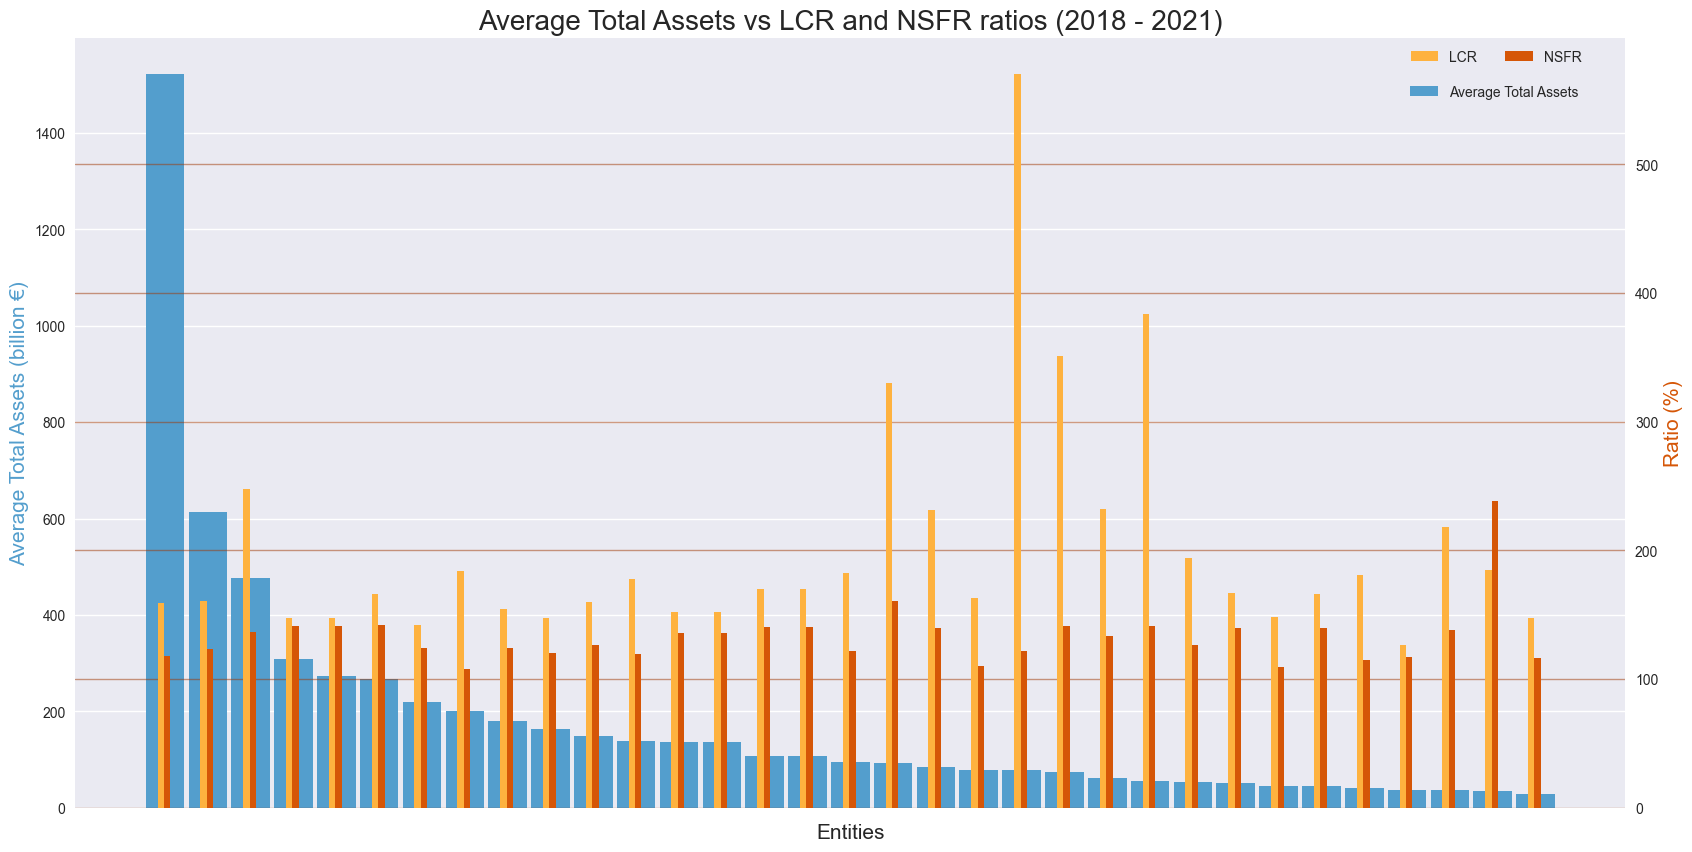

In [50]:
data_aggregate['Avg tot assets'] = data_aggregate.iloc[:,10:14].mean(axis=1)
data_aggregate['Avg LCR'] = data_aggregate.iloc[:,14:18].mean(axis=1)
data_aggregate['Avg NSFR'] = data_aggregate.iloc[:,18:22].mean(axis=1)
bar_width=0.15
x_pos=np.arange(0,33)

fig, ax1 = plt.subplots(figsize = (20, 10))

ax1.bar(x_pos, data_aggregate.sort_values('Avg tot assets', ascending=False)['Avg tot assets'],
        color=blues[3], width = 0.9, label='Average Total Assets')
ax1.set_xlabel('Entities', fontsize=15)
ax1.set_xticklabels([])
ax1.set_ylabel('Average Total Assets (billion €)', color=blues[3], fontsize=15)
plt.title("Average Total Assets vs LCR and NSFR ratios (2018 - 2021)", fontsize=20)
plt.grid(axis="y", alpha=1)
plt.grid(axis="x", alpha=0.0)

ax2 = ax1.twinx()
ax2.bar(x_pos - 0.1,
        data_aggregate.sort_values('Avg tot assets', ascending=False)['Avg LCR'],
        color=yellows[2], width = 0.15, label='LCR')
ax2.set_ylabel('Ratio (%)', color=yellows[4], fontsize=15)

ax2.bar(x_pos + bar_width - 0.1,
        data_aggregate.sort_values('Avg tot assets', ascending=False)['Avg NSFR'],
        color=yellows[4], width = 0.15, label='NSFR')

ax1.legend(loc='upper right', ncol = 2, borderaxespad = 3)
ax2.legend(loc='upper right', ncol = 2, bbox_to_anchor = (0.98, 1))

plt.grid(color=yellows[5], alpha=1)
plt.grid(axis="y", alpha=0.5)
plt.grid(axis="x", alpha=0.0)

plt.show()

The purpose of this barplot is to show the asset levels along the LCR and NSFR levels for the 25 entities we had data for.

On the Y-axis: on the left hand side we have the asset levels in billions, while on the right hand side we have the ratio levels in %. We were not interested in which banks had these levels since we wanted to analyze only the assets-ratios relationship, in fact the name of the entities is not shown. 

But coming into the interpretation, it looks like that the more the assets level of a bank decrease, the greater is the heterogeneity between LCR and NSFR. Whereas for bigger banks (whose assets are higher), the two ratios tend to be more similar. This could be due to the fact that bigger banks are more invested in having similar short and long term ratio levels, to jointly control and plan liquidity needs both in the short term and in the long term. 

Overall we can't draw univoque conclusions, it's clear that the thourghout the entities all the ratios tend to average out in the mean level of the EU zone, even if there as outliers with really huge LCR ratio values and an enourmous spread in the two ratios. 

In [51]:
data_aggregate.head()

,Company name Latin alphabet,Inactive,Quoted,Branch,OwnData,Woco,Sifi,Country ISO code,Consolidation code,Last avail. year,...,LCR 2019,LCR 2020,LCR 2021,NSFR 2018,NSFR 2019,NSFR 2020,NSFR 2021,Avg tot assets,Avg LCR,Avg NSFR
0,BANCO SANTANDER SA,No,Yes,No,No,Yes,Yes,Spain,C2,2022,...,147.0,168.00,163.0,114.0,112.0,120.00,126.0,1521.50,159.0000,118.000
1,COOPERATIEVE RABOBANK U.A.,No,No,No,No,Yes,No,Netherlands,C2,2022,...,132.0,192.77,184.0,119.0,118.0,127.48,129.5,613.00,160.9425,123.495
2,"CAIXABANK, S.A.",No,Yes,No,No,No,No,Spain,C2,2022,...,179.0,276.00,336.0,117.0,129.0,145.00,154.0,477.50,247.7500,136.250
3,KBC GROEP NV/ KBC GROUPE SA,No,Yes,No,No,Yes,No,Belgium,C2,2022,...,138.0,147.00,167.0,136.0,136.0,146.00,148.0,309.00,147.7500,141.500
4,ERSTE GROUP BANK AG,No,Yes,No,No,Yes,No,Austria,C2,2022,...,148.0,189.30,177.3,138.0,134.8,145.20,150.2,266.75,166.1750,142.050


In [52]:
colors = sn.color_palette("hls", 10)
sn.set_palette(colors)

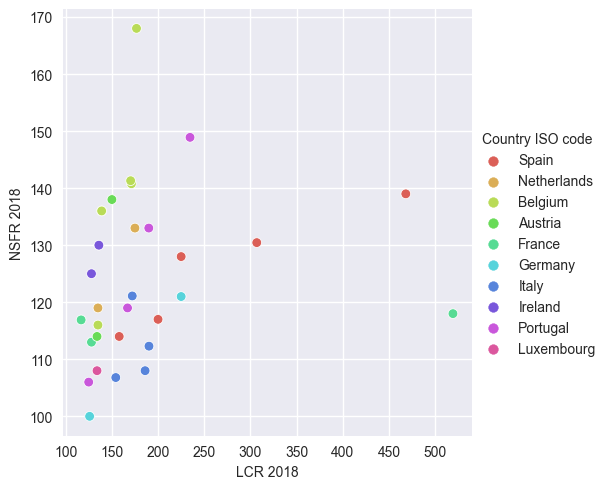

In [53]:
sn.relplot(data=data_aggregate, x="LCR 2018", y="NSFR 2018", hue="Country ISO code")
plt.show()

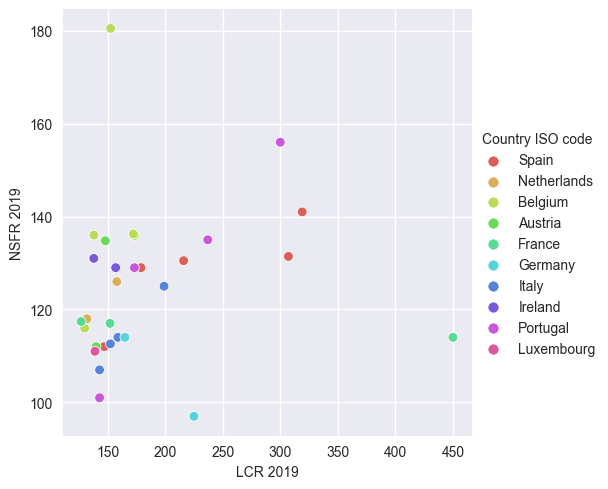

In [54]:
sn.relplot(data=data_aggregate, x="LCR 2019", y="NSFR 2019", hue="Country ISO code")
plt.show()

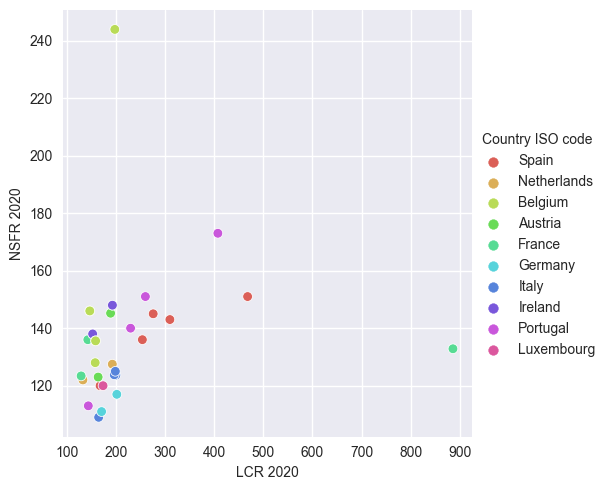

In [55]:
sn.relplot(data=data_aggregate, x="LCR 2020", y="NSFR 2020", hue="Country ISO code")
plt.show()

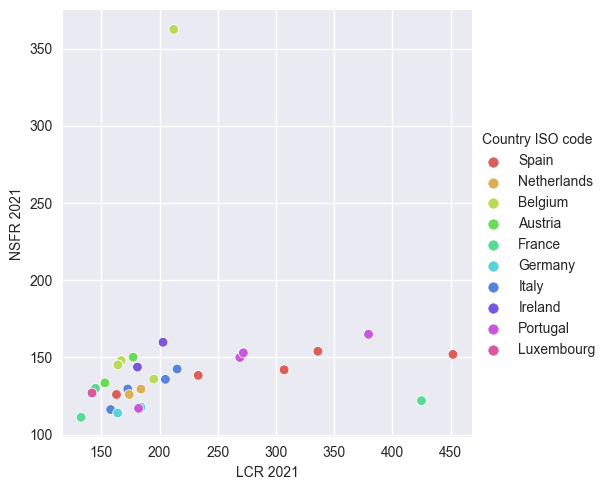

In [56]:
sn.relplot(data=data_aggregate, x="LCR 2021", y="NSFR 2021", hue="Country ISO code")
plt.show()

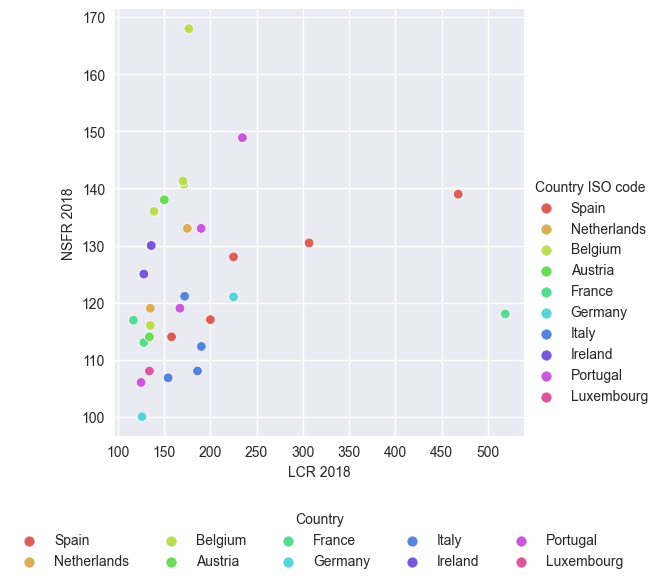

In [57]:
# to have horizontal legend
colors = sn.color_palette("hls", 10)
sn.set_palette(colors)
sn.relplot(data=data_aggregate, x="LCR 2018", y="NSFR 2018", hue="Country ISO code", legend="brief")
plt.legend(title="Country", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()